# Reference
https://pyimagesearch.com/2014/07/07/color-quantization-opencv-using-k-means-clustering/

In [23]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
from sklearn.cluster import MiniBatchKMeans

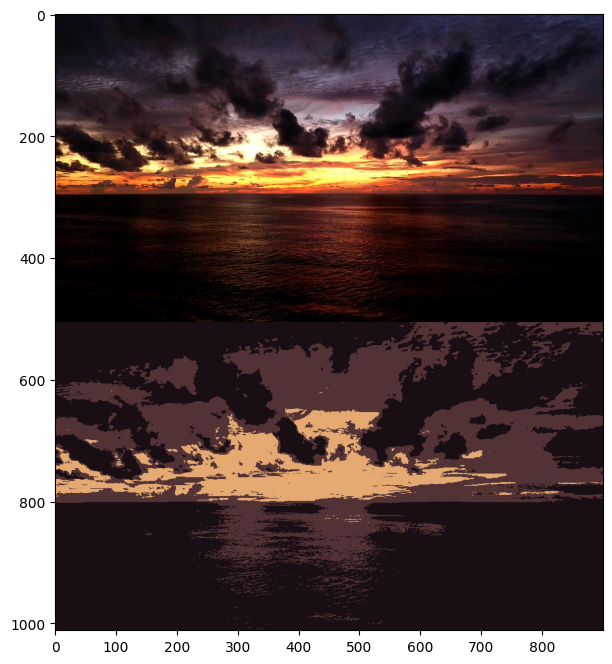

In [58]:
image = cv2.imread('../resources/color_transfer_sample2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

h, w = image.shape[:2]
# transform to train format
image = image.reshape(h * w, 3)

clt = MiniBatchKMeans(n_clusters=3)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype('uint8')[labels]

quant = quant.reshape(h, w, 3)
image = image.reshape(h, w, 3)

quant = cv2.cvtColor(quant, cv2.COLOR_Lab2BGR)
image = cv2.cvtColor(image, cv2.COLOR_Lab2BGR)

quant = cv2.cvtColor(quant, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(np.vstack([image, quant]))
